In [70]:
#فراخوانی کتابخانه ها
import pandas as pd
import numpy as np

In [71]:
# لود دیتاست 
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


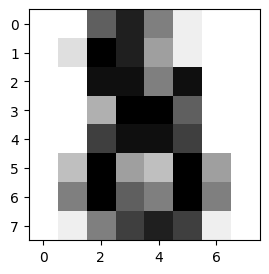

In [72]:
#پلات یک نمونه
import matplotlib.pyplot as plt

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

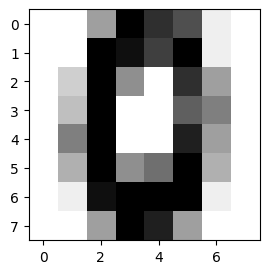

In [73]:
#پلات  یک نمونه
import matplotlib.pyplot as plt

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-4], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [74]:
# svm model with kernel=linear and estimating train and test accuracies

import sklearn.svm as sv
from sklearn import model_selection as ms
from sklearn import preprocessing
from sklearn.svm import SVC

X = digits.data
Y = digits.target

Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 21)


Classifier = sv.SVC(kernel = 'linear')
Classifier.fit(Xtr, Ytr)

trAcc=Classifier.score(Xtr,Ytr)
teAcc=Classifier.score(Xte,Yte)

print ('Train accuracy:',trAcc)
print('Test accuracy',teAcc)

Train accuracy: 1.0
Test accuracy 0.9833333333333333


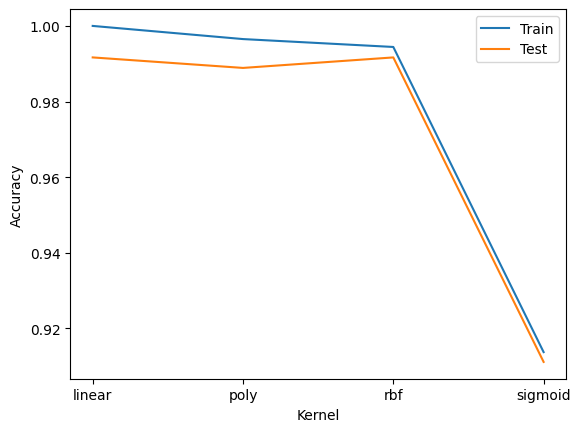

In [75]:
#svm model with kernels=linear, poly,rbf,sigmoid and plot

X = digits.data
Y = digits.target

Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 1)

trAcc = []
teAcc = []
Kernel = []
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    Classifier = sv.SVC(kernel = i, degree = 2)
    Classifier.fit(Xtr, Ytr)
    trAcc.append(Classifier.score(Xtr, Ytr))
    teAcc.append(Classifier.score(Xte, Yte))
    Kernel.append(i)

plt.plot(trAcc, label = 'Train')
plt.plot(teAcc, label = 'Test')
plt.xticks([0, 1, 2, 3], Kernel)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# svm model with kernel=rbf and estimating train and test accuracies

import sklearn.svm as sv
from sklearn import model_selection as ms
from sklearn import preprocessing
from sklearn.svm import SVC

X = digits.data
Y = digits.target

Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 21)


Classifier = sv.SVC(kernel = 'rbf')
Classifier.fit(Xtr, Ytr)

trAcc=Classifier.score(Xtr,Ytr)
teAcc=Classifier.score(Xte,Yte)

print ('Train accuracy:',trAcc)
print('Test accuracy',teAcc)

Train accuracy: 0.9951287404314544
Test accuracy 0.9861111111111112


In [76]:
#نرمالسازی داده
normalized = preprocessing.normalize(X)
print("Normalized Data = ", normalized)


Normalized Data =  [[0.         0.         0.09024036 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.15413829 0.         0.        ]
 [0.         0.         0.         ... 0.24153867 0.1358655  0.        ]
 ...
 [0.         0.         0.0140138  ... 0.08408278 0.         0.        ]
 [0.         0.         0.03044313 ... 0.18265877 0.         0.        ]
 [0.         0.         0.14230641 ... 0.17076769 0.01423064 0.        ]]


In [77]:
#Linear svm model

import sklearn.svm as sv
from sklearn import model_selection as ms
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = digits.data
Y = digits.target

Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 1)


Classifier = sv.LinearSVC(dual=False,multi_class='crammer_singer', C=1e10)
Classifier.fit(Xtr, Ytr)
y_pred = Classifier.predict(Xte)

trAcc=Classifier.score(Xtr,Ytr)
teAcc=Classifier.score(Xte,Yte)

print ('Train accuracy:',trAcc)
print('Test accuracy',teAcc)

print(Classifier.intercept_)
print(Classifier.coef_)
pred=Classifier.predict(Xte)
predictions = pred.reshape(-1,1)

print('MSE : ', mean_squared_error(Yte,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(Yte,predictions)))



Train accuracy: 1.0
Test accuracy 0.9611111111111111
[ 0.00131951 -0.00995655  0.0012517   0.00055281  0.00843682 -0.00520923
 -0.00135077  0.00142365  0.01648682 -0.01296885]
[[ 0.00000000e+00  7.15316001e-04 -3.54021312e-04 -1.26552772e-02
   1.54221566e-02 -7.40842376e-03 -1.51937533e-02 -1.77106800e-03
   0.00000000e+00 -1.18773854e-02  1.95953381e-04  4.95316964e-02
  -6.24336980e-03  1.31646536e-02 -3.12959230e-03 -1.81932867e-03
   0.00000000e+00 -9.92865919e-03  2.22002619e-02 -2.11652196e-03
  -8.58927947e-02  4.69819017e-02  5.10700912e-03 -5.04458577e-04
   0.00000000e+00  2.31164413e-02  3.44014258e-02 -3.10237569e-02
  -9.02996677e-02  2.09942557e-03  2.45138467e-02  0.00000000e+00
   0.00000000e+00  5.20444368e-02  8.37674869e-03 -3.31250948e-02
  -8.52435743e-02  1.37906139e-02  2.20487168e-02  0.00000000e+00
   0.00000000e+00  1.74361397e-03  5.47637309e-02 -3.49481437e-02
  -4.43112098e-02  2.46597306e-02  2.18293824e-02  0.00000000e+00
   0.00000000e+00 -1.29026113e-0

C:\Users\MD\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


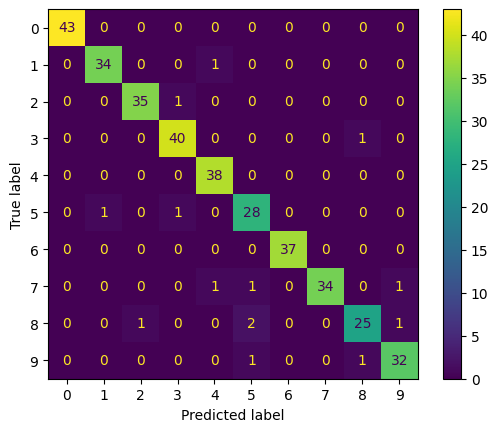

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(Yte, y_pred, labels=Classifier.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Classifier.classes_)
disp.plot()
plt.show()

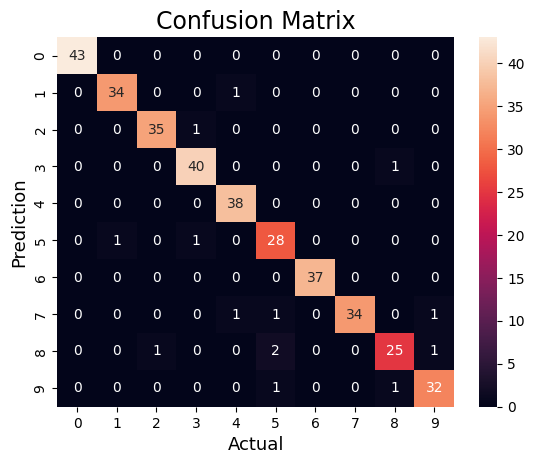

In [79]:
import seaborn as sns

cm = confusion_matrix(Yte,y_pred)
  
# Plot the confusion matrix.

sns.heatmap(cm, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
  


In [80]:
# reporting of linear svc with precision, recall, f1-score

from sklearn.metrics import classification_report
 
print(classification_report(Yte, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        35
           2       0.97      0.97      0.97        36
           3       0.95      0.98      0.96        41
           4       0.95      1.00      0.97        38
           5       0.88      0.93      0.90        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       0.93      0.86      0.89        29
           9       0.94      0.94      0.94        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [81]:
#Logisic regression model

import sklearn.linear_model as lm


Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 32)

LR = lm.LogisticRegression(max_iter = 5000)
LR.fit(Xtr, Ytr)
trAcc = LR.score(Xtr, Ytr)
teAcc = LR.score(Xte, Yte)

print('Train Acc.: ', trAcc)
print('Test Acc.: ', teAcc)


Train Acc.:  1.0
Test Acc.:  0.975


In [82]:
# svm model with kernel=rbf and estimating train and test accuracies

import sklearn.svm as sv
from sklearn import model_selection as ms
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = digits.data
Y = digits.target

Xtr, Xte, Ytr, Yte = ms.train_test_split(X, Y, train_size = 0.8, random_state = 21)


Classifier = sv.SVC(kernel = 'rbf',C=1e10)
Classifier.fit(Xtr, Ytr)

trAcc=Classifier.score(Xtr,Ytr)
teAcc=Classifier.score(Xte,Yte)

print ('Train accuracy:',trAcc)
print('Test accuracy',teAcc)


param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(Classifier, param_grid, refit = True, verbose = 3)
  
# فیت کردن مدل برای گرید سرچ
grid.fit(Xtr, Ytr)

# بهترین پارامتر بعد از تنطیم
print(grid.best_params_)
  
# بعد از تنطیم هایپرپارامتر
print(grid.best_estimator_)



Train accuracy: 1.0
Test accuracy 0.9972222222222222
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.104 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.105 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.105 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.206 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.104 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.105 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.104 total time=  

In [83]:
grid_predictions = grid.predict(Xte)
  
print(classification_report(Yte, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.99        36
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40
           8       0.98      0.98      0.98        42
           9       1.00      0.97      0.98        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

